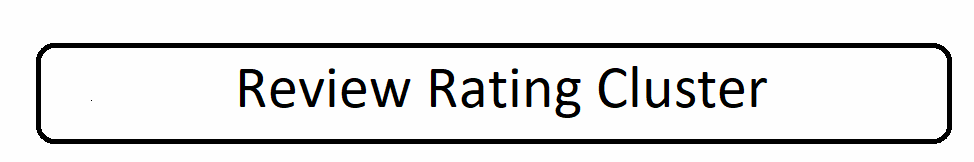

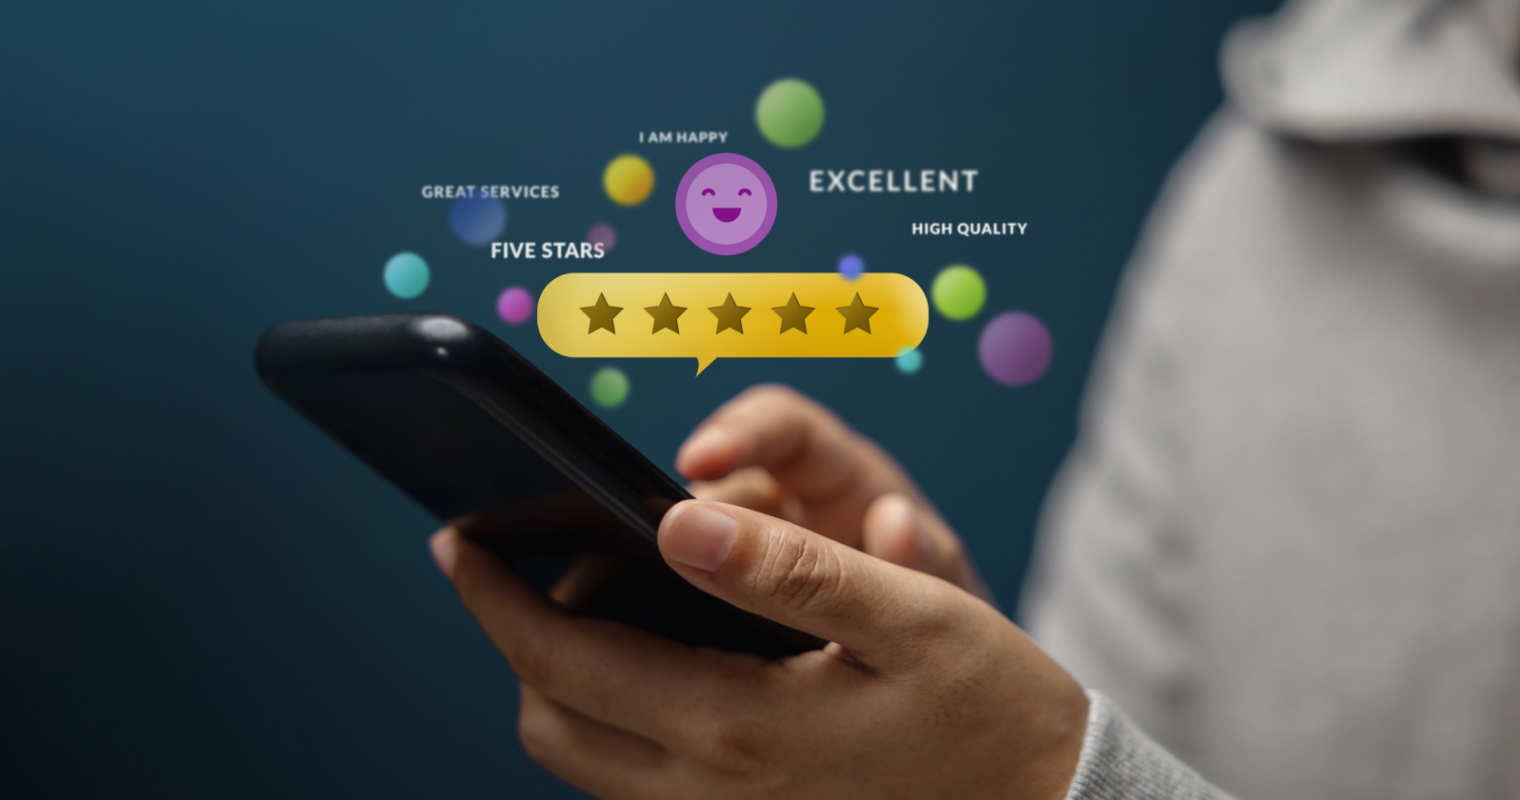

## Clustering :

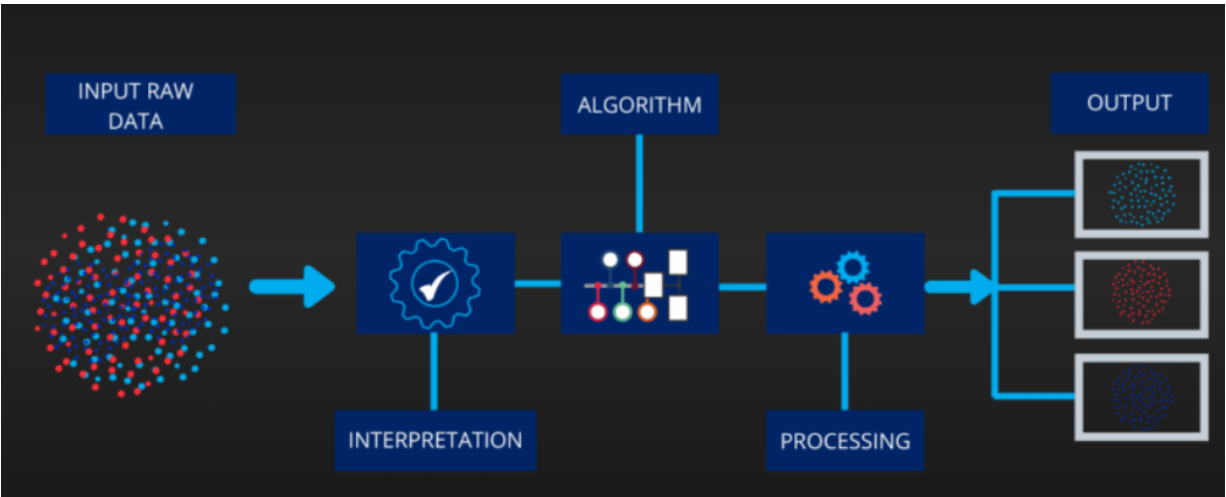

- Clustering is the process of dividing uncategorized data into similar groups or clusters. This process ensures that similar data points are identified and grouped. Clustering algorithms is key in the processing of data and identification of groups
- No target variable or labels are associated with dataset
- The goal of clustering is to discover inherent patterns or structures in the data without any predefined labels

## Types of clustering in unsupervised machine learning
- The main types of clustering in unsupervised machine learning include K-means, hierarchical clustering, Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

## K-means Clustering:

- The variable K represents the number of groups or categories created. The goal is to split the data into K different clusters and report the location of the center of mass for each cluster. Then, a new data point can be assigned a cluster (class) based on the closed center of mass.

- Squared Euclidean distance and cluster inertia are the two key concepts in K-means clustering.

####  K-Means cluster follows Lloyd's Algorithm

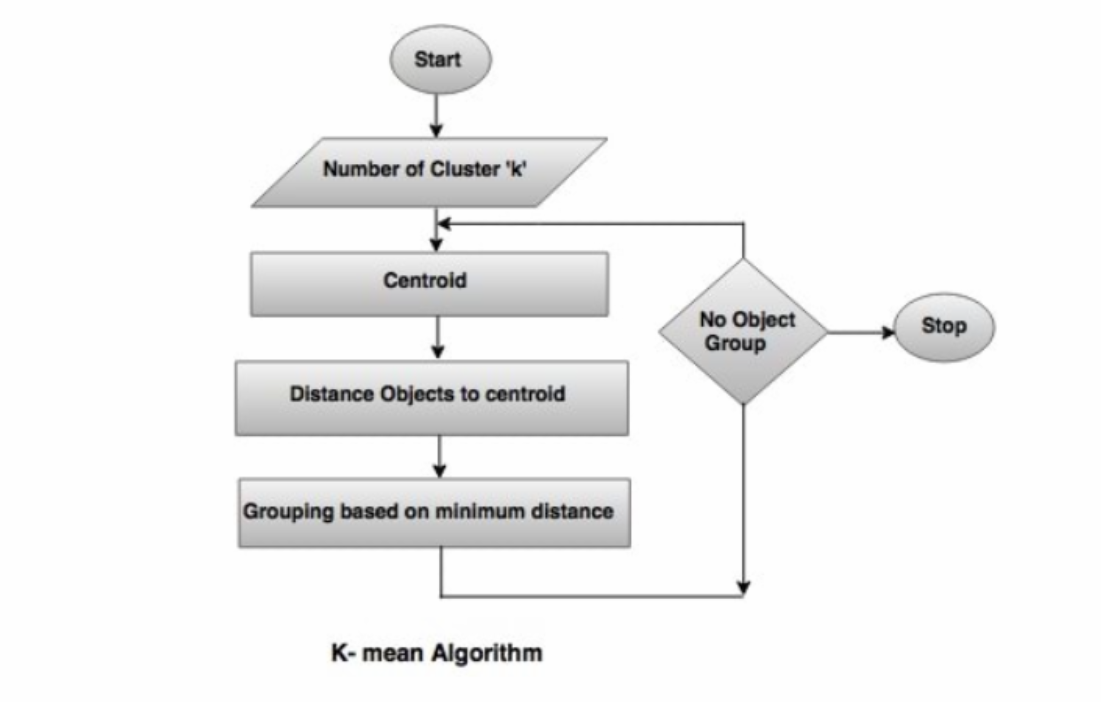

- CONCLUSION:K-means tries to minimize the within-cluster sum of squared (wcss) distances, which means that it aims to create clusters where the data points are close to the center of their own cluster

### Hierarchical Clustering:
Hierarchical clustering creates a tree-like structure of clusters, known as a dendrogram. It's an agglomerative process, where each
data point starts as an individual cluster and is iteratively merged into larger clusters based on proximity. The linkage method defines
how the distance between clusters is calculated. Hierarchical clustering doesn't require pre-defining the number of clusters and can
help visualize different levels of granularity in clustering results.
Both clustering models offer distinct advantages. K-means is computationally efficient and well-suited for a large number of data
points, while hierarchical clustering provides a hierarchical representation that can aid in understanding relationships between
clusters. Employing both models enhances the project's ability to explore different perspectives of the data and identify meaningful
clusters.

## importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

## Reading Dataset

In [ ]:
data=pd.read_csv('ReviewRatings.csv')

In [ ]:
data

In [ ]:
data.drop('User',axis=1,inplace=True)

## Data Cleaning : 

In [ ]:
data.duplicated().any()

## Exploring Dataset

In [ ]:
data.info()

- No missing values
- only user is object datatype

In [ ]:
desc=data.describe().T
def descriptive_stats(df):
    plt.figure(figsize=(8,5))
    sns.heatmap(df, annot=True, cmap='rocket', fmt=".2f")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.title('Statistical Description')
    plt.show()
descriptive_stats(desc)

## Exploratory Data Analysis (EDA)

In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(data)

## Distribution:

In [ ]:
def distplots(col):
    sns.distplot(data[col])
    plt.show()
for i in data.columns:
    distplots(i)

In [ ]:
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

## Building Model

### Case- I : Clustering with venues Resorts and Lodgings

In [ ]:
x=data.loc[:,['Resorts','Lodgings']].values

In [ ]:
x

## Featuring scaling:

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(x_sc)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

In [ ]:
len(wcss)

In [ ]:
a=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]

## Inertia Calculation (Using Elbow Method):
- Inertia is within cluster sum of squares criteron (calculating error- sum square distance(Euclidean distance) between the centroid and
each point). It is metric shows how internally coherent the clusters are. Inertia assumes the cluster

In [ ]:
sns.pointplot(a,wcss)

In [ ]:
k_val1=3

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=1)
y_kmeans_1 = kmeans.fit_predict(x_sc)
y_kmeans_1

In [ ]:
plt.scatter(x[y_kmeans_1==0,0], x[y_kmeans_1==0,1], s=100, c='red', label='Cluster0')
plt.scatter(x[y_kmeans_1==1,0], x[y_kmeans_1==1,1], s=100, c='black', label='Cluster1')
plt.scatter(x[y_kmeans_1==2,0], x[y_kmeans_1==2,1], s=100, c='green', label='Cluster2')
plt.show()

## silhouette score:

- Overall Evaluation (Silhouette Analysis)
The evaluation of a K-means clustering model is often performed using a metric called the silhouette distance. The silhouette distance
metric yields values within the range of [-1, +1]. A higher silhouette distance value indicates a better quality model, with values
approaching +1 suggesting that the clusters are well-separated and distinct.
In summary, the silhouette distance serves as a measure to assess the effectiveness of a K-means clustering model. A silhouette
distance closer to +1 signifies that the clusters formed are distinct and well-defined, indicating a stronger and more reliable clustering
solution.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score1=silhouette_score(x_sc,y_kmeans_1)
print(silhouette_score1)

## Hierarcheal cluster

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
plt.figure(figsize=(18,16))
dendrogram=sch.dendrogram(sch.linkage(x_sc,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Rating details')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
hc=AgglomerativeClustering(n_clusters=3 , affinity='euclidean',linkage='ward')
y_hc1=hc.fit_predict(x_sc)

In [ ]:
print(y_hc1)

In [ ]:
silhouette_score_hc1=silhouette_score(x_sc,y_hc1)
print(silhouette_score_hc1)

## Case-II : Clustering with food and drinks attarction Restaurants ,
## Bars , Fast Food , Juice Bars , Bakeries , Cafes

In [ ]:
x2=data.loc[:,['Restaurants','Bars','Fast Food','Juice Bars','Bakeries','Cafes']].values

In [ ]:
x2

In [ ]:
x_sc2=sc.fit_transform(x2)

In [ ]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(x_sc2)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

In [ ]:
sns.pointplot(a,wcss)

In [ ]:
k_val2=7

In [ ]:
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=1)
y_kmeans_2 = kmeans.fit_predict(x_sc2)
y_kmeans_2

In [ ]:
plt.scatter(x2[y_kmeans_2==0,0], x2[y_kmeans_2==0,1], s=100, c='skyblue', label='Cluster0')
plt.scatter(x2[y_kmeans_2==1,0], x2[y_kmeans_2==1,1], s=100, c='pink', label='Cluster1')
plt.scatter(x2[y_kmeans_2==2,0], x2[y_kmeans_2==2,1], s=100, c='violet', label='Cluster2')
plt.scatter(x2[y_kmeans_2==3,0], x2[y_kmeans_2==3,1], s=100, c='green', label='Cluster3')
plt.scatter(x2[y_kmeans_2==4,0], x2[y_kmeans_2==4,1], s=100, c='red', label='Cluster4')
plt.scatter(x2[y_kmeans_2==5,0], x2[y_kmeans_2==5,1], s=100, c='black', label='Cluster5')
plt.scatter(x2[y_kmeans_2==6,0], x2[y_kmeans_2==6,1], s=100, c='yellow', label='Cluster6')
plt.show()

In [ ]:
silhouette_score2=silhouette_score(x_sc2,y_kmeans_2)
print(silhouette_score2)

In [ ]:
plt.figure(figsize=(18,16))
dendrogram=sch.dendrogram(sch.linkage(x_sc2,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Rating details')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
hc2=AgglomerativeClustering(n_clusters=7 , affinity='euclidean',linkage='ward')
y_hc2=hc2.fit_predict(x_sc2)
y_hc2

In [ ]:
silhouette_score_hc2=silhouette_score(x_sc2,y_hc2)
print(silhouette_score_hc2)

## Case-III : Clustering with outdoor attractions Beaches ,
## Parks , Gardens


In [ ]:
x3=data.loc[:,['Beaches','Parks','Gardens']].values

In [ ]:
x3

In [ ]:
x_sc3=sc.fit_transform(x3)
x_sc3

In [ ]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(x_sc3)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

In [ ]:
sns.pointplot(a,wcss)

In [ ]:
k_value3=4

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=1)
y_kmeans_3 = kmeans.fit_predict(x_sc3)
y_kmeans_3

In [ ]:
plt.scatter(x3[y_kmeans_3==0,0], x3[y_kmeans_3==0,1], s=100, c='skyblue', label='Cluster0')
plt.scatter(x3[y_kmeans_3==1,0], x3[y_kmeans_3==1,1], s=100, c='pink', label='Cluster1')
plt.scatter(x3[y_kmeans_3==2,0], x3[y_kmeans_3==2,1], s=100, c='violet', label='Cluster2')
plt.scatter(x3[y_kmeans_3==3,0], x3[y_kmeans_3==3,1], s=100, c='yellow', label='Cluster3')
plt.show()

In [ ]:
silhouette_score3=silhouette_score(x_sc3,y_kmeans_3)
print(silhouette_score3)

In [ ]:
plt.figure(figsize=(18,16))
dendrogram=sch.dendrogram(sch.linkage(x_sc3,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Rating details')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
hc3=AgglomerativeClustering(n_clusters=4 , affinity='euclidean',linkage='ward')
y_hc3=hc3.fit_predict(x_sc3)
y_hc3

In [ ]:
silhouette_score_hc3=silhouette_score(x_sc3,y_hc3)
print(silhouette_score_hc3)

## Case-IV : Clustering with indoor attarction -I Malls , Theatres


In [ ]:
x4=data.loc[:,['Malls','Theatres']].values
x4

In [ ]:
x_sc4=sc.fit_transform(x4)
x_sc4

In [ ]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(x_sc4)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

In [ ]:
sns.pointplot(a,wcss)

In [ ]:
k_value4=4

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=1)
y_kmeans_4 = kmeans.fit_predict(x_sc4)
y_kmeans_4

In [ ]:
plt.scatter(x4[y_kmeans_4==0,0], x4[y_kmeans_4==0,1], s=100, c='skyblue', label='Cluster0')
plt.scatter(x4[y_kmeans_4==1,0], x4[y_kmeans_4==1,1], s=100, c='pink', label='Cluster1')
plt.scatter(x4[y_kmeans_4==2,0], x4[y_kmeans_4==2,1], s=100, c='violet', label='Cluster2')
plt.scatter(x4[y_kmeans_4==3,0], x4[y_kmeans_4==3,1], s=100, c='yellow', label='Cluster3')
plt.show()

In [ ]:
silhouette_score4=silhouette_score(x_sc4,y_kmeans_4)
print(silhouette_score4)

In [ ]:
plt.figure(figsize=(18,16))
dendrogram=sch.dendrogram(sch.linkage(x_sc4,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Rating details')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
hc4=AgglomerativeClustering(n_clusters=4 , affinity='euclidean',linkage='ward')
y_hc4=hc4.fit_predict(x_sc4)
y_hc4

In [ ]:
silhouette_score_hc4=silhouette_score(x_sc4,y_hc4)
print(silhouette_score_hc4)

## Case-V : Clustering with activities Dance Clubs , Gyms and
## Swimming Pools

In [ ]:
x5=data.loc[:,['Dance Clubs','Gyms','Swimming Pools']].values
x5

In [ ]:
x_sc5=sc.fit_transform(x5)
x_sc5

In [ ]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(x_sc5)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

In [ ]:
sns.pointplot(a,wcss)

In [ ]:
k_value5=5

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=1)
y_kmeans_5 = kmeans.fit_predict(x_sc5)
y_kmeans_5

In [ ]:
plt.scatter(x5[y_kmeans_5==0,0], x5[y_kmeans_5==0,1], s=100, c='skyblue', label='Cluster0')
plt.scatter(x5[y_kmeans_5==1,0], x5[y_kmeans_5==1,1], s=100, c='pink', label='Cluster1')
plt.scatter(x5[y_kmeans_5==2,0], x5[y_kmeans_5==2,1], s=100, c='violet', label='Cluster2')
plt.scatter(x5[y_kmeans_5==3,0], x5[y_kmeans_5==3,1], s=100, c='yellow', label='Cluster3')
plt.scatter(x5[y_kmeans_5==4,0], x5[y_kmeans_5==4,1], s=100, c='red', label='Cluster4')
plt.show()

In [ ]:
silhouette_score5=silhouette_score(x_sc5,y_kmeans_5)
print(silhouette_score5)

In [ ]:
plt.figure(figsize=(18,16))
dendrogram=sch.dendrogram(sch.linkage(x_sc5,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Rating details')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
hc5=AgglomerativeClustering(n_clusters=5 , affinity='euclidean',linkage='ward')
y_hc5=hc5.fit_predict(x_sc5)
y_hc5

In [ ]:
silhouette_score_hc5=silhouette_score(x_sc5,y_hc5)
print(silhouette_score_hc5)

## Case-VI : Clustering with indoor attraction-II Art Galleries ,
## Museums

In [ ]:
x6=data.loc[:,['Art Galleries','Museums']].values
x6

In [ ]:
x_sc6=sc.fit_transform(x6)
x_sc6

In [ ]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(x_sc6)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

In [ ]:
sns.pointplot(a,wcss)

In [ ]:
k_value6=3

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=1)
y_kmeans_6 = kmeans.fit_predict(x_sc6)
y_kmeans_6

In [ ]:
plt.scatter(x6[y_kmeans_6==0,0], x6[y_kmeans_6==0,1], s=100, c='skyblue', label='Cluster0')
plt.scatter(x6[y_kmeans_6==1,0], x6[y_kmeans_6==1,1], s=100, c='pink', label='Cluster1')
plt.scatter(x6[y_kmeans_6==2,0], x6[y_kmeans_6==2,1], s=100, c='violet', label='Cluster2')
plt.show()

In [ ]:
silhouette_score6=silhouette_score(x_sc6,y_kmeans_6)
print(silhouette_score6)

In [ ]:
plt.figure(figsize=(18,16))
dendrogram=sch.dendrogram(sch.linkage(x_sc6,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Rating details')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
hc6=AgglomerativeClustering(n_clusters=3 , affinity='euclidean',linkage='ward')
y_hc6=hc6.fit_predict(x_sc6)
y_hc6

In [ ]:
silhouette_score_hc6=silhouette_score(x_sc6,y_hc6)
print(silhouette_score_hc6)

## Case-VII : Clustering with outdoor attractions -II Monuments , View
## Points , Zoo

In [ ]:
x7=data.loc[:,['Monuments','View Points','Zoo']].values
x7

In [ ]:
x_sc7=sc.fit_transform(x7)
x_sc7

In [ ]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(x_sc7)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

In [ ]:
sns.pointplot(a,wcss)

In [ ]:
k_value7=4

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=1)
y_kmeans_7 = kmeans.fit_predict(x_sc7)
y_kmeans_7

In [ ]:
plt.scatter(x7[y_kmeans_7==0,0], x7[y_kmeans_7==0,1], s=100, c='skyblue', label='Cluster0')
plt.scatter(x7[y_kmeans_7==1,0], x7[y_kmeans_7==1,1], s=100, c='pink', label='Cluster1')
plt.scatter(x7[y_kmeans_7==2,0], x7[y_kmeans_7==2,1], s=100, c='violet', label='Cluster2')
plt.scatter(x7[y_kmeans_7==3,0], x7[y_kmeans_7==3,1], s=100, c='red', label='Cluster3')
plt.show()

In [ ]:
silhouette_score7=silhouette_score(x_sc7,y_kmeans_7)
print(silhouette_score7)

In [ ]:
plt.figure(figsize=(18,16))
dendrogram=sch.dendrogram(sch.linkage(x_sc7,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Rating details')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
hc7=AgglomerativeClustering(n_clusters=4 , affinity='euclidean',linkage='ward')
y_hc7=hc7.fit_predict(x_sc7)
y_hc7

In [ ]:
silhouette_score_hc7=silhouette_score(x_sc7,y_hc7)
print(silhouette_score_hc7)

# ▨ Conclusion

- Through rigorous experimentation with k-means and hierarchical clustering techniques and thorough evaluation using silhouette scores, we gained valuable insights into how different features contribute to effective clustering of the review rating dataset. This work sets the foundation for deeper explorations into customer's rating on different types of venues or attractions. decision-making based on the identified clusters.


- The clustering model are build with following categories
> - Boarding Venue : [`Resorts`,`Lodgings`]
> - Food and drinks attraction : [`Restaurants`, `Bars`,`Fast Food`,`Juice Bars`,`Bakeries`,`Cafes`]
> - Outdoor attarction - I : [`Beaches`, `Parks`,`Gardens`]
> - Outdoor attarction - II : [`Monuments`, `View Points`, `Zoo`]
> - Indoor Attraction - I : [`Malls`, `Theatres`]
> - Indoor Attraction - II : [`Art Galleries`, `Museums`,]
> - Activities : [`Dance Clubs`, `Gyms`,`Swimming Pools`]
